In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, expon, binom, poisson, gamma, beta

# Function to add uniform line y=E[barp]
def add_mean_line(ax, y_mean, color='black', linestyle='--', label='E[barp]'):
    ax.axhline(y=y_mean, color=color, linestyle=linestyle, label=label)

def p_bar(x):
    return 1 - x


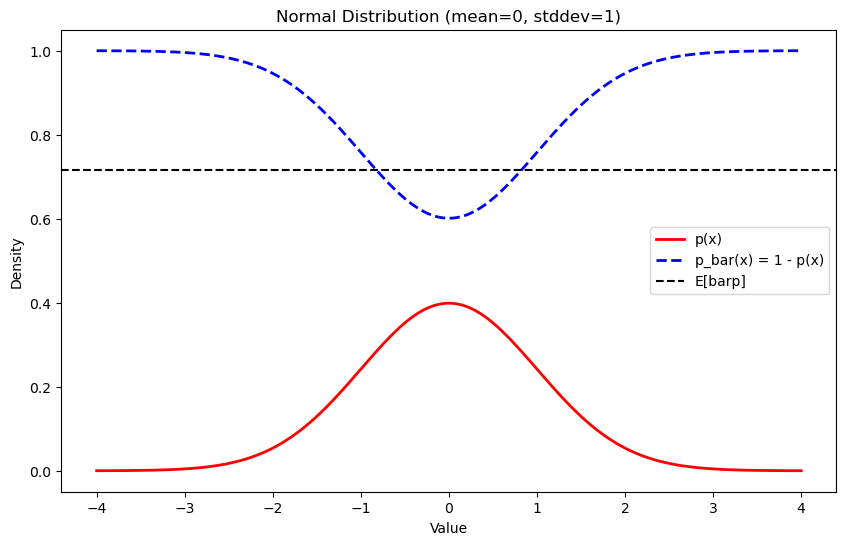

In [10]:
# 1. Normal Distribution (mean=0, stddev=1)
x_values = np.linspace(-4, 4, 1000)
pdf_values = norm.pdf(x_values, loc=0, scale=1)
p_bar_values = 1 - pdf_values
# Compute E[p_bar] as sum(p(x) * (1 - p(x)))

expectation_p_bar = np.sum(pdf_values * (1 - pdf_values)) / len(x_values) * 8

plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_values, 'r-', lw=2, label='p(x)')
plt.plot(x_values, p_bar_values, 'b--', lw=2, label='p_bar(x) = 1 - p(x)')
add_mean_line(plt, expectation_p_bar)
plt.title("Normal Distribution (mean=0, stddev=1)")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
#a is the minimum value where if you lift the straight line it almost surely becomes higher than the p_bar graph.
#for a given probability array. we need to calculate E[p_bar], then p(p_bar(x)> aE[p_bar]) 
#must be zero for a minimal a.

In [14]:
#p = np.array([0.595, 0.058, 0.058, 0.058, 0.058, 0.058, 0.058, 0.058])
p = np.array([0.5, 0.25, 0.125, 0.062, 0.062])
#p = np.random.rand(10000)


In [21]:
def calculate_expectation(probabilities, func):
    """
    Calculate the expectation of a function over an array of probabilities.

    :param probabilities: List or array of probabilities
    :param func: Function to apply to each probability
    :return: Expectation value
    """
    probabilities = np.array(probabilities)
    
    # Ensure the probabilities are normalized
    probabilities = probabilities / np.sum(probabilities)
    
    # Apply the function to each probability
    values = func(probabilities)
    
    # Calculate the expectation
    expectation = np.sum(values * probabilities)
    
    return expectation

def p_bar(x):
    return 1-x

def sum_greater_than_alpha(array, alpha):
    """
    Sum the values in the array that are greater than a given alpha.

    :param array: List or array of numbers
    :param alpha: Threshold value
    :return: Sum of values greater than alpha
    """
    array = np.array(array)
    return np.sum(1- array[array > alpha])

In [15]:
#calculate p(p_bar(x)> aE[p_bar]) somehow...
p_bar(p)

array([0.5  , 0.75 , 0.875, 0.938, 0.938])

In [16]:
calculate_expectation(p, p_bar)

0.6635143652160669

In [25]:
sum_greater_than_alpha(p_bar(p), 1.4*calculate_expectation(p, p_bar))

0.12400000000000011

In [27]:
#use a similiar approch to bisection method to find mininal a
#Im assuming for 2 we always have p(p_bar(x)> aE[p_bar]) = 0
def bisection_method(p, tolerance=1e-7):
    """
    Solve for a solution of a function using the bisection method.

    :param func: Function for which to find the root
    :param low: Lower bound of the interval
    :param high: Upper bound of the interval
    :param tolerance: Tolerance for stopping criteria
    :return: Approximate root of the function
    """
    low, high = 1 , 2
    while high - low > tolerance:
        midpoint = (low + high) / 2
        if sum_greater_than_alpha(p_bar(p), midpoint*calculate_expectation(p, p_bar)) == 0:
            high = midpoint
        else:
            low = midpoint
    return (low + high) / 2

In [28]:
bisection_method(p)

1.4136845171451569